<a href="https://colab.research.google.com/github/willystw/fastai-learning/blob/dog-identification/dog-identification/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [36]:
#hide
from fastbook import *

Install Kaggle

In [37]:
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Upload kaggle.json manually

In [7]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-27 09:22:05          11302        929  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6888        519  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2669        196  1.0              
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020

In [8]:
!kaggle competitions download -c dog-breed-identification

 99% 685M/691M [00:04<00:00, 137MB/s]
100% 691M/691M [00:04<00:00, 146MB/s]


In [9]:
!mkdir dog-breed
!unzip dog-breed-identification.zip -d dog-breed

Streaming output truncated to the last 5000 lines.
  inflating: dog-breed/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog-breed/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog-breed/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog-breed/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog-breed/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog-breed/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog-breed/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog-breed/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog-breed/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog-breed/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog-breed/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog-breed/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog-breed/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog-breed/train/840db91ba4600148f3dcb06ec419b421.jpg

In [38]:
df = pd.read_csv('dog-breed/labels.csv')
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [39]:
def get_x(r): return f"dog-breed/train/{r['id']}.jpg"
def get_y(r): return r['breed']

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x = get_x,
    get_y = get_y,
    splitter = RandomSplitter(seed=42),
    item_tfms = Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dls = dblock.dataloaders(df)

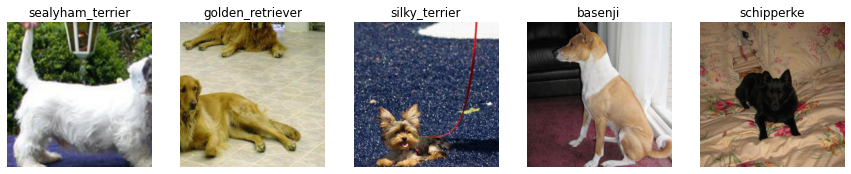

In [12]:
dls.show_batch(nrows=1, ncols=5)

In [13]:
dblock.summary(df)

Setting-up type transforms pipelines
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]
Found 10222 items
2 datasets of sizes 8178,2044
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipe

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ValueError: ignored

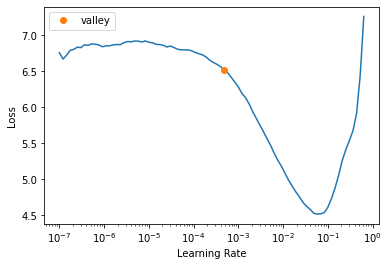

In [40]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
lr_min,lr_steep = learn.lr_find()

In [41]:
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.613768,0.762451,0.242172,03:11
1,0.941206,0.618557,0.188356,03:12
2,0.579747,0.503525,0.148728,03:11


epoch,train_loss,valid_loss,error_rate,time
0,0.462672,0.495870,0.152153,04:09
1,0.479787,0.487673,0.148239,04:09
2,0.421396,0.477344,0.149706,04:09
3,0.397617,0.480533,0.147750,04:07
4,0.364783,0.469296,0.144325,04:08
5,0.309635,0.480928,0.149217,04:08
6,0.311013,0.480024,0.149706,04:08
7,0.271353,0.477400,0.149217,04:09
8,0.253176,0.477324,0.147260,04:08
9,0.235673,0.479548,0.151174,04:08
